In [5]:
from object_detector import ObjectDetector
import pandas as pd

In [6]:
detector = ObjectDetector('config/yolov4.weights',
                          'config/yolov4.cfg', 'config/coco.names')
# detector = ObjectDetector('config/yolov3-tiny.weights',
#                           'config/yolov3-tiny.cfg', 'config/coco.names')

In [7]:
records = []

def process(detections, frame_number, curr_ms):
    global records
    records = records + detector.build_records(detections, frame_number, curr_ms)

detector.stream_videofile('sample.mp4', process)
records = pd.DataFrame(records)

In [78]:
records

,frame_number,timestamp,class,confidence,x,y,width,height
0,0.0,0.000000,person,0,428,141,47,112
1,0.0,0.000000,bicycle,1,436,190,44,84
2,0.0,0.000000,car,2,187,164,29,13
3,0.0,0.000000,car,2,0,168,21,12
4,0.0,0.000000,traffic light,9,176,99,7,14
...,...,...,...,...,...,...,...,...
219,1098.0,71.484375,motorbike,3,-3,157,325,204
220,1110.0,72.265625,motorbike,3,-11,156,492,205
221,1116.0,72.656250,bicycle,1,-2,153,470,208
222,1122.0,73.046875,bicycle,1,-2,156,457,205


In [20]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
person = records[records['class'] == 'person']
person

,frame_number,timestamp,class,confidence,x,y,width,height
0,0.0,0.000000,person,0,428,141,47,112
6,6.0,0.390625,person,0,420,139,53,119
12,12.0,0.781250,person,0,404,134,58,129
17,18.0,1.171875,person,0,384,133,67,132
27,24.0,1.562500,person,0,352,121,85,152
...,...,...,...,...,...,...,...,...
206,852.0,55.468750,person,0,515,147,79,112
209,858.0,55.859375,person,0,516,145,76,115
211,858.0,55.859375,person,0,92,-2,254,242
214,864.0,56.250000,person,0,514,145,80,114


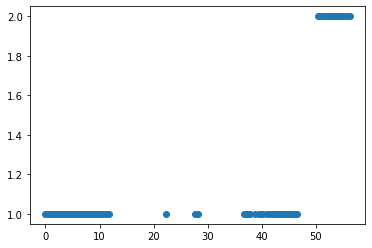

In [34]:
counts = person.groupby(['timestamp']).count()['class']
ts = np.array(counts.index)
class_counts = np.array(counts)
plt.scatter(ts, class_counts)

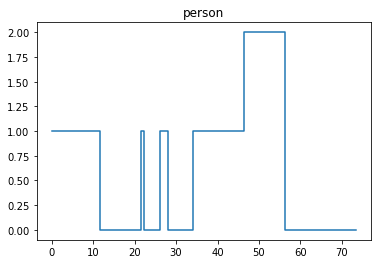

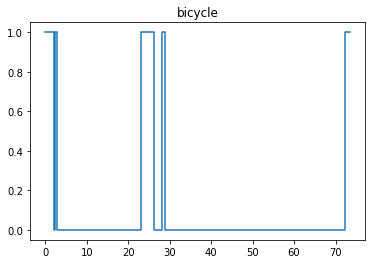

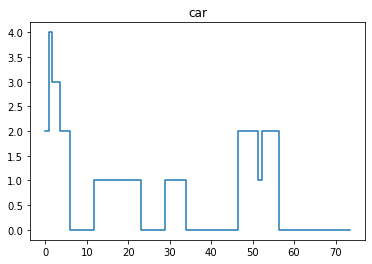

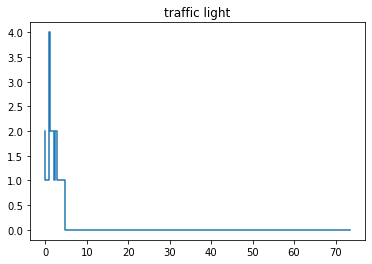

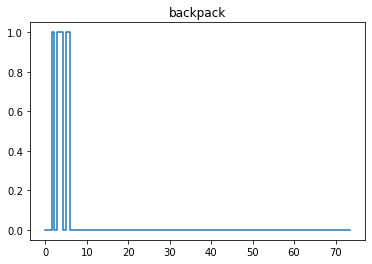

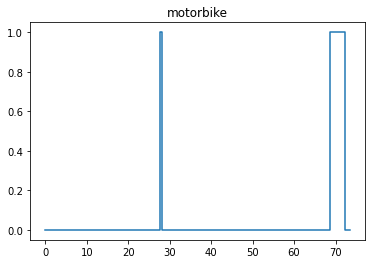

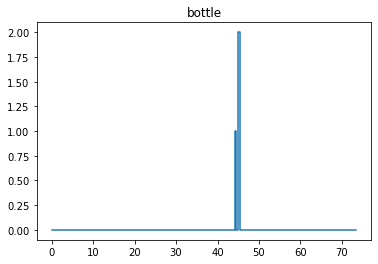

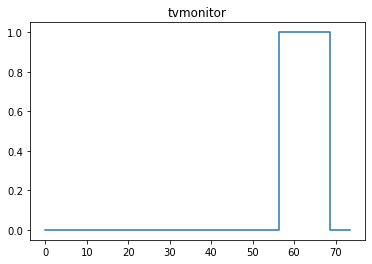

In [77]:


for classname in records['class'].unique():
    class_group = records[records['class'] == classname]
    grouped = class_group.groupby(['timestamp']).count()['class']
    
    missing = np.setdiff1d(records['timestamp'].unique(), grouped.index)
    missing_series = pd.Series(np.zeros(len(missing)), index=missing, dtype=np.int64)

    concatenated = pd.concat([grouped, missing_series])
    concatenated = concatenated.sort_index()
    
    plt.title(classname)
    ts = np.array(concatenated.index)
    class_counts = np.array(concatenated)
    plt.step(ts, class_counts)
    plt.show()

In [46]:
records['frame_number'].unique()

array([   0.,    6.,   12.,   18.,   24.,   30.,   36.,   42.,   48.,
         54.,   60.,   66.,   72.,   78.,   84.,   90.,   96.,  102.,
        108.,  114.,  120.,  126.,  132.,  138.,  144.,  150.,  156.,
        162.,  168.,  174.,  180.,  186.,  192.,  294.,  300.,  306.,
        312.,  318.,  324.,  330.,  342.,  348.,  354.,  372.,  384.,
        390.,  396.,  402.,  426.,  432.,  438.,  444.,  522.,  564.,
        570.,  576.,  582.,  594.,  606.,  612.,  618.,  630.,  636.,
        642.,  648.,  654.,  660.,  666.,  672.,  678.,  684.,  690.,
        696.,  702.,  708.,  714.,  774.,  780.,  786.,  792.,  798.,
        804.,  810.,  816.,  822.,  828.,  834.,  840.,  846.,  852.,
        858.,  864., 1056., 1086., 1098., 1110., 1116., 1122., 1128.])

In [50]:
records[records['class'] == 'person']

,frame_number,timestamp,class,confidence,x,y,width,height
0,0.0,0.000000,person,0,428,141,47,112
6,6.0,0.390625,person,0,420,139,53,119
12,12.0,0.781250,person,0,404,134,58,129
17,18.0,1.171875,person,0,384,133,67,132
27,24.0,1.562500,person,0,352,121,85,152
...,...,...,...,...,...,...,...,...
206,852.0,55.468750,person,0,515,147,79,112
209,858.0,55.859375,person,0,516,145,76,115
211,858.0,55.859375,person,0,92,-2,254,242
214,864.0,56.250000,person,0,514,145,80,114


In [52]:
class_group = records[records['class'] == 'person']
grouped = class_group.groupby(['timestamp']).count()['class']
grouped

timestamp
0.000000     1
0.390625     1
0.781250     1
1.171875     1
1.562500     1
            ..
54.687500    2
55.078125    2
55.468750    2
55.859375    2
56.250000    2
Name: class, Length: 73, dtype: int64

In [54]:

records['timestamp'].unique()

array([ 0.      ,  0.390625,  0.78125 ,  1.171875,  1.5625  ,  1.953125,
        2.34375 ,  2.734375,  3.125   ,  3.515625,  3.90625 ,  4.296875,
        4.6875  ,  5.078125,  5.46875 ,  5.859375,  6.25    ,  6.640625,
        7.03125 ,  7.421875,  7.8125  ,  8.203125,  8.59375 ,  8.984375,
        9.375   ,  9.765625, 10.15625 , 10.546875, 10.9375  , 11.328125,
       11.71875 , 12.109375, 12.5     , 19.140625, 19.53125 , 19.921875,
       20.3125  , 20.703125, 21.09375 , 21.484375, 22.265625, 22.65625 ,
       23.046875, 24.21875 , 25.      , 25.390625, 25.78125 , 26.171875,
       27.734375, 28.125   , 28.515625, 28.90625 , 33.984375, 36.71875 ,
       37.109375, 37.5     , 37.890625, 38.671875, 39.453125, 39.84375 ,
       40.234375, 41.015625, 41.40625 , 41.796875, 42.1875  , 42.578125,
       42.96875 , 43.359375, 43.75    , 44.140625, 44.53125 , 44.921875,
       45.3125  , 45.703125, 46.09375 , 46.484375, 50.390625, 50.78125 ,
       51.171875, 51.5625  , 51.953125, 52.34375 , 

12.109375    0
12.500000    0
19.140625    0
19.531250    0
19.921875    0
20.312500    0
20.703125    0
21.093750    0
21.484375    0
22.656250    0
23.046875    0
24.218750    0
25.000000    0
25.390625    0
25.781250    0
26.171875    0
28.515625    0
28.906250    0
33.984375    0
68.750000    0
70.703125    0
71.484375    0
72.265625    0
72.656250    0
73.046875    0
73.437500    0
dtype: int64